In [1]:
import numpy as np

In [3]:
from mmfewshot.detection.apis import init_detector, inference_detector
import mmcv

# Specify the path to model config and checkpoint file
config_file = '/home/BI/luunvt/image_retrieval/mmfewshot/work_dirs/tfa_r101_fpn_voc-split1_2shot-16head_papasan_fine-tuning/tfa_r101_fpn_voc-split1_2shot-16head_papasan_fine-tuning.py'
checkpoint_file = '/home/BI/luunvt/image_retrieval/mmfewshot/work_dirs/tfa_r101_fpn_voc-split1_2shot-16head_papasan_fine-tuning/model_papasan_16head_iter_5000.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# test a single image and show the results
img = '/home/BI/luunvt/image_retrieval/data/image/GAR-514/B0BJQDZL5Q_1.jpg'  # or img = mmcv.imread(img), which will only load it once
result = inference_detector(model, img)
# visualize the results in a new window
model.show_result(img, result)
# or save the visualization results to image files
# model.show_result(img, result, out_file='result.jpg')

In [5]:
import cv2
import numpy as np

## (1) Convert to gray, and threshold

# dst = img[y:y+h, x:x+w]
color = (255, 0, 0)
thickness = 1
img = cv2.rectangle(img, (x, y), (x + w, y + h), color, thickness)
# cv2.imshow("img.jpg", img)
cv2.imwrite("img.jpg", img)

True

In [4]:
# from PIL import Image
  
# im = Image.open(r"/home/BI/luunvt/image_retrieval/data/photo_2023-04-11_08-17-05.jpg")
# print(im.size)

# im = Image.open(r"/home/BI/luunvt/image_retrieval/mmfewshot/001.png") 
# print(im.size)
import cv2
im = cv2.imread(r"/home/BI/luunvt/image_retrieval/data/photo_2023-04-11_08-17-05.jpg")
x, y, _ = im.shape

im_crop = cv2.imread(r"/home/BI/luunvt/image_retrieval/mmfewshot/001.png")
xx, yy, _ = im_crop.shape

color = (255, 0, 0)
thickness = 1
x1 = x // 2 - (xx // 2)
y1 = y // 2 - (yy // 2)
x2 = x1 + xx
y2 = y1 + yy
img = cv2.rectangle(im, (x1, y1), (x2, y2), color, thickness)
cv2.imwrite("img.jpg", img)

True

In [22]:
import os
img_prefix = '/home/BI/luunvt/image_retrieval/mmfewshot/data/VOCdevkit/'
img_list = [
  "VOC2012/JPEGImages/1.jpg",
  "VOC2012/JPEGImages/2.jpg",
  "VOC2012/JPEGImages/3.jpg",
  "VOC2012/JPEGImages/4.jpg",
  "VOC2012/JPEGImages/B0B2ZQXM9X.jpg",
  "VOC2012/JPEGImages/B087269Y9N.jpg",
  "VOC2012/JPEGImages/B0872639NV.jpg",
  "VOC2012/JPEGImages/B0873492WZ.jpg",
  "VOC2012/JPEGImages/B09LYT1T1T.jpg",
  "VOC2012/JPEGImages/B0872925R3.jpg"
]

for img in img_list:
  path = os.path.join(img_prefix, img)
  im = Image.open(path) 
  print(img.split("/")[-1], im.size)

1.jpg (679, 788)
2.jpg (679, 711)
3.jpg (679, 816)
4.jpg (679, 321)
B0B2ZQXM9X.jpg (425, 499)
B087269Y9N.jpg (439, 450)
B0872639NV.jpg (450, 606)
B0873492WZ.jpg (341, 450)
B09LYT1T1T.jpg (425, 539)
B0872925R3.jpg (314, 450)


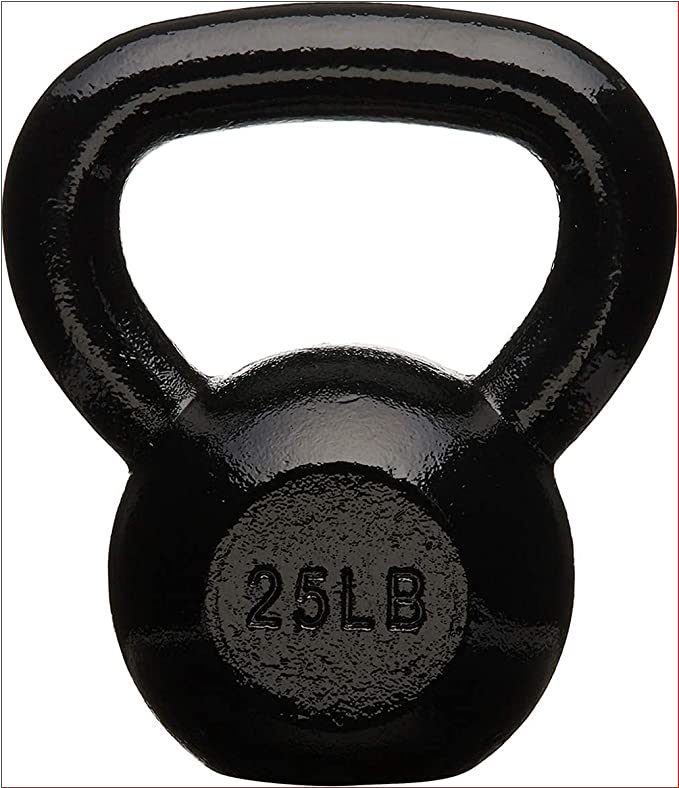

In [19]:
import math
from PIL import Image, ImageDraw
  

img1 = Image.open("/home/BI/luunvt/image_retrieval/mmfewshot/data/VOCdevkit/VOC2012/JPEGImages/1.jpg")  
shape = [(1, 1), (img1.size[0] - 1, img1.size[1] - 1)]
draw = ImageDraw.Draw(img1)
draw.rectangle(shape, outline='red')

img1.show()

In [3]:
import torch
import torchvision

# Define the input and anchor box tensors
input_tensor = torch.randn(1, 3, 224, 224)
anchor_boxes = torch.randn(1, 300, 4)

# Define the region proposal network (RPN) and detection network
rpn = torchvision.models.detection.rpn.RPNHead(1024, 256, anchor_generator=torchvision.models.detection.rpn.AnchorGenerator(sizes=((32, 64, 128),), aspect_ratios=((0.5, 1.0, 2.0),)))
rpn_output = rpn(torch.randn(1, 1024, 14, 14))

# Extract the objectness scores and bounding box regression values from the RPN output
objectness_scores = torch.sigmoid(rpn_output[..., :3])
bbox_deltas = rpn_output[..., 3:]

# Generate the object proposals using the anchor boxes and the RPN output
proposals, _ = torchvision.ops.MultiScaleRoIAlign(
  featmap_names=['0'],
  output_size=7,
  sampling_ratio=2,
  featmap_strides=[16],
  box_roi_pool=torchvision.ops.RoIAlign(output_size=(7, 7), spatial_scale=1, sampling_ratio=-1),
  rpn_head=torchvision.models.detection.rpn.RPNHead(1024, 256, anchor_generator=torchvision.models.detection.rpn.AnchorGenerator(sizes=((32, 64, 128),), aspect_ratios=((0.5, 1.0, 2.0),))),
  rpn_anchor_generator=torchvision.models.detection.rpn.AnchorGenerator(sizes=((32, 64, 128),), aspect_ratios=((0.5, 1.0, 2.0),)),
  rpn_pre_nms_top_n_train=2000,
  rpn_pre_nms_top_n_test=1000,
  rpn_post_nms_top_n_train=2000,
  rpn_post_nms_top_n_test=1000,
  rpn_nms_thresh=0.7,
  rpn_fg_iou_thresh=0.7,
  rpn_bg_iou_thresh=0.3,
  rpn_batch_size_per_image=256,
  rpn_positive_fraction=0.5
)(rpn_output, [anchor_boxes])

# Apply the bounding box regression values to the object proposals
deltas = bbox_deltas.reshape((-1, 4))
anchors = anchor_boxes.reshape((-1, 4))
proposals = proposals.reshape((-1, 4))
proposals = torchvision.ops.box_convert(proposals, 'xyxy', 'xywh')
proposals = torchvision.ops.box_convert(torch.cat([proposals[:, :2] + deltas[:, :2] * proposals[:, 2:], proposals[:, 2:] * torch.exp(deltas[:, 2:])], dim=1), 'xywh', 'xyxy')

# Example usage
print(proposals.shape)


TypeError: __init__() got an unexpected keyword argument 'anchor_generator'

In [ ]:
import cv2

im = cv2.imread(r"/home/BI/luunvt/image_retrieval/data/img/3223/B01LZ1A7JF.jpg") 
print(im.shape)
img_cropped = im[2:208, 191:250]
cv2.imshow('img', img_cropped)

# im = Image.open(r"/home/BI/luunvt/image_retrieval/mmfewshot/data/VOCdevkit/VOC2012/JPEGImages/3223_B004JKCO06.jpg") 
# print(im.size)